# Netflix Movies - TV Shows
En este notebook analizaremos, en primera instancia el dataset que se obtuvo de la página web de [Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows).

---
## APERTURA DEL DATASET
---


Antes de iniciar, importamos las librerías que utilizaremos.

In [455]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import warnings
warnings.filterwarnings('ignore')
import datetime

Como primera medida, hay que abrir el archivo *.csv*

In [456]:
archive = pd.read_csv("netflix_titles.csv")
df = pd.DataFrame(archive)

Observemos, por primera vez el dataset:

In [457]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Como nos indica el pie de tabla: el dataset tiene más de ocho mil títulos diferentes con doce columnas referentes a distintas características.

---
---
```EL SIGUIENTE FRAGMENTO ESTÁ DESTINADO AL ENTENDIMIENTO DE LOS PROGRAMADORES Y LAS TRANSFORMACIONES QUE HABRÍA QUE HACERLE AL DATASET.```

Renombremos las columnas:

In [458]:
df.rename(columns= {
    'show_id': 'id_show',
    'type': 'tipo',
    'title': 'titulo',
    'director': 'director',
    'cast': 'casting',
    'country': 'pais',
    'date_added': 'fecha_de_inclusion_a_la_plataforma',
    'release_year': 'año_de_lanzamiento',
    'duration': 'duracion',
    'listed_in': 'lista_generos',
    'description': 'descripcion'
}, inplace= True)

Ahora veamos los tipos de datos que están en las columnas:

In [459]:
df.dtypes

id_show                               object
tipo                                  object
titulo                                object
director                              object
casting                               object
pais                                  object
fecha_de_inclusion_a_la_plataforma    object
año_de_lanzamiento                     int64
rating                                object
duracion                              object
lista_generos                         object
descripcion                           object
dtype: object

Como podemos observar, hay columnas que están mal constituidas; como la columna con la fecha de inclusión a la plataforma que la incluye forma de texto en lugar de una fecha.

Hagamos, de a una, las transformaciones necesarias para poder obtener las columnas con valores óptimos para su posterior análisis y utilización.

In [460]:
df['id_show'] = df['id_show'].apply(lambda x: x.replace('s', ''))
df['id_show'] = df['id_show'].apply(lambda n: int(n))
df.id_show.dtypes

dtype('int64')

In [461]:
meses = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
dates = []
for obj3ct in df['fecha_de_inclusion_a_la_plataforma']:
    if type(obj3ct) != str:
        dates.append('None')
    else:    
        for num, month in enumerate(meses):
            if month in obj3ct:
                obj3ct = obj3ct.replace(month, str(str(num + 1) + ","))
                
            else:
                pass
        dates.append(obj3ct)
len(dates)

df['fecha_de_inclusion_a_la_plataforma'] = dates
lista = []
for date in df['fecha_de_inclusion_a_la_plataforma']:
    dict_dates = {}
    mark = 0
    string = ""
    for letter in date:
        if letter == " ":
            pass
        elif letter == ",":
            dict_dates[mark] = string
            mark += 1
            string = ""
        else:
            string = string + letter
        dict_dates[mark] = string
    try:
        lista.append([str(dict_dates[1]), str(dict_dates[0]), str(dict_dates[2])])
    except KeyError:
        lista.append(string)
for conn in lista:
    try:
        if type(conn) != list:
            pass
        else:
            if len(conn[1]) == 1:
                conn[1] = "0" + conn[1]

            if len(conn[0]) == 1:
                conn[0] = "0" + conn[0]

    except IndexError:
        pass

lista
df['fecha_de_inclusion_a_la_plataforma'] = lista
df['fecha_de_inclusion_a_la_plataforma'] = df['fecha_de_inclusion_a_la_plataforma'].apply(lambda x: "-".join(x))
dates2 = []
for date in df['fecha_de_inclusion_a_la_plataforma']:
    if 'None' in date:
        dates2.append(date)
    else:
        try:
            date = datetime.datetime.strptime(date, "%d-%m-%Y")
            dates2.append(date)
        except ValueError:
            dates2.append(np.nan)

dates2
df['fecha_de_inclusion_a_la_plataforma'] = dates2

In [462]:
df['fecha_de_inclusion_a_la_plataforma'].dtypes

dtype('<M8[ns]')

In [463]:
df.dtypes

id_show                                        int64
tipo                                          object
titulo                                        object
director                                      object
casting                                       object
pais                                          object
fecha_de_inclusion_a_la_plataforma    datetime64[ns]
año_de_lanzamiento                             int64
rating                                        object
duracion                                      object
lista_generos                                 object
descripcion                                   object
dtype: object

---
---
## ```AHORA PROSIGUE EL ANÁLISIS```
---
---


En primera instancia, vamos a separar el dataset en dos: Shows de televisión y Películas.

In [464]:
categories = df['tipo'].unique()
print(f"Hay {len(categories)} categorías: {list(categories)}")

Hay 2 categorías: ['Movie', 'TV Show']


In [465]:
movies = df[df['tipo'].str.contains("Movie", case= False, na= False)]
shows = df[df['tipo'].str.contains("TV Show", case= False, na= False)]

print(f"Hay {movies.shape[0]} películas. Y {shows.shape[0]} TV Shows.")

Hay 6131 películas. Y 2676 TV Shows.


### Películas.

Comencemos con el dataset de películas y si contiene valores nulos.

In [466]:
print(f"Cantidad de nulos por columna: {dict(movies.isnull().sum())}")

Cantidad de nulos por columna: {'id_show': 0, 'tipo': 0, 'titulo': 0, 'director': 188, 'casting': 475, 'pais': 440, 'fecha_de_inclusion_a_la_plataforma': 0, 'año_de_lanzamiento': 0, 'rating': 2, 'duracion': 3, 'lista_generos': 0, 'descripcion': 0}


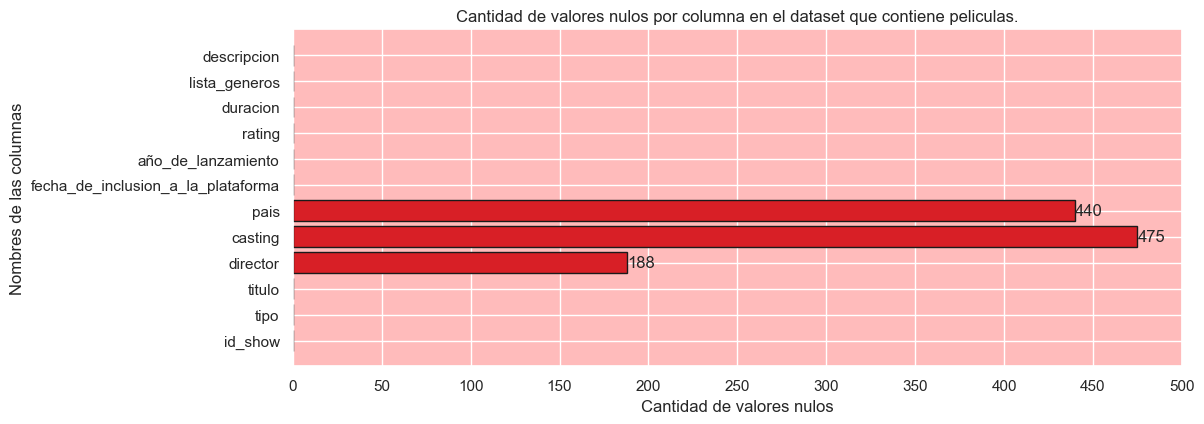

In [490]:
nulls_movies = dict(movies.isnull().sum())

fig, ax =plt.subplots(figsize=(12, 4))
ax.barh(y= list(nulls_movies.keys()), width= list(nulls_movies.values()), color= '#d81f26', edgecolor= 'k')
ax.set_facecolor('#ffBBBB')
for y, x in enumerate(nulls_movies.values()):
    if x >= 1:
        plt.text(x, y, str(x), ha= 'left', va= 'center')

ax.set_xticks(np.linspace(0, 500, 11))
plt.tight_layout()
ax.set_title("Cantidad de valores nulos por columna en el dataset que contiene peliculas.")
ax.set_xlabel("Cantidad de valores nulos")
ax.set_ylabel("Nombres de las columnas")
plt.show()

Como podemos ver, dentro del dataset de películas exiten algunos registros que tienen valores nulos.

Veamos cuanto porcentaje, del total de películas, representan los valores nulos.

In [468]:
# Solamente haremos el cálculo para las columnas que sí contienen valores nulos:
total = movies.shape[0]
print(f"Porcentaje de nulos para la columna 'Duración': % {nulls_movies['duracion'] * 100 / total}")
print(f"Porcentaje de nulos para la columna 'rating': % {nulls_movies['rating'] * 100 / total}")
print(f"Porcentaje de nulos para la columna 'pais': % {nulls_movies['pais'] * 100 / total}")
print(f"Porcentaje de nulos para la columna 'casting': % {nulls_movies['casting'] * 100 / total}")
print(f"Porcentaje de nulos para la columna 'director': % {nulls_movies['director'] * 100 / total}")

Porcentaje de nulos para la columna 'Duración': % 0.04893165878323275
Porcentaje de nulos para la columna 'rating': % 0.032621105855488504
Porcentaje de nulos para la columna 'pais': % 7.176643288207471
Porcentaje de nulos para la columna 'casting': % 7.747512640678519
Porcentaje de nulos para la columna 'director': % 3.066383950415919


Como pudimos calcular, la cantidad de valores nulos no representa ni la décima parte del total del dataset. Podemos tratar con eso.

In [469]:
print(f"Registros con valores nulos: {movies[movies.isnull().any(axis=1)].shape[0]}.")

Registros con valores nulos: 946.


In [470]:
print(f"Porcentaje, sobre el total de películas, de registros con valores nulos: {movies[movies.isnull().any(axis=1)].shape[0] * 100 / movies.shape[0]} %")

Porcentaje, sobre el total de películas, de registros con valores nulos: 15.429783069646062 %


En todo el dataset, despreciando las columnas, poco más del 15% de los registros contiene, al menos, un valor nulo.

In [471]:
print(f"Los valores nulos abarcan el {sum(movies.isnull().sum()) * 100 / (movies.shape[0] * movies.shape[1])} % de todos los datos del dataset.")

Los valores nulos abarcan el 1.5060077203283857 % de todos los datos del dataset.


Un valor manejable para nuestras construir nuestras predicciones.

### TV Shows

Veamos, cuantos nulos tiene cada columna.

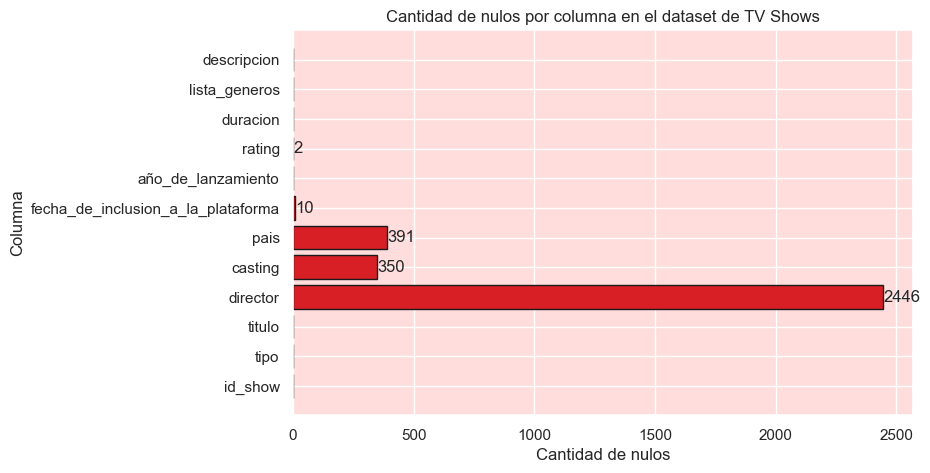

In [496]:
nulls_tv = dict(shows.isnull().sum())

fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(y= list(nulls_tv.keys()), width= list(nulls_tv.values()), color= "#d81f26", edgecolor= 'k')
ax.set_facecolor('#ffdddd')
for y, x in enumerate(nulls_tv.values()):
    if x > 0:
        ax.text(x, y, str(x), ha= 'left', va= 'center')

ax.set_title("Cantidad de nulos por columna en el dataset de TV Shows")
ax.set_xlabel("Cantidad de nulos")
ax.set_ylabel("Columna")
plt.show()

En el caso del dataset con los shows de televisión, los nulos están más presentes.

Son muchos más nulos, haciendo la comparación con el dataset de las películas. Veamos, también, el porcentaje, respecto al total de series, de los valores nulos.

In [473]:
print(f"Porcentaje de nulos en la columna 'director': {nulls_tv['director'] * 100 / shows.shape[0]} %")
print(f"Porcentaje de nulos en la columna 'casting': {nulls_tv['casting'] * 100 / shows.shape[0]} %")
print(f"Porcentaje de nulos en la columna 'pais': {nulls_tv['pais'] * 100 / shows.shape[0]} %")
print(f"Porcentaje de nulos en la columna 'fecha_de_inclusion_a_la_plataforma': {nulls_tv['fecha_de_inclusion_a_la_plataforma'] * 100 / shows.shape[0]} %")
print(f"Porcentaje de nulos en la columna 'rating': {nulls_tv['rating'] * 100 / shows.shape[0]} %")

Porcentaje de nulos en la columna 'director': 91.4050822122571 %
Porcentaje de nulos en la columna 'casting': 13.079222720478326 %
Porcentaje de nulos en la columna 'pais': 14.611360239162929 %
Porcentaje de nulos en la columna 'fecha_de_inclusion_a_la_plataforma': 0.37369207772795215 %
Porcentaje de nulos en la columna 'rating': 0.07473841554559044 %


En este caso, la columna de Directores se encuentra sumamente vacía, con más del 90% conteniendo nulos. Es algo que no podríamos utilizar para nuestras predicciones. Por lo tanto, deberíamos eliminarla.

In [474]:
print(f"Existen {shows[shows.isnull().any(axis=1)].shape[0]} registros con valores nulos.")

Existen 2529 registros con valores nulos.


In [475]:
print(f"Estos registros representan el {shows[shows.isnull().any(axis=1)].shape[0] * 100 / shows.shape[0]} % de todo el dataset.")
print(f"Y el {sum(shows.isnull().sum()) * 100 / (shows.shape[0] * shows.shape[1])} % de todos los valores, son nulos.")

Estos registros representan el 94.5067264573991 % de todo el dataset.
Y el 9.962007972097657 % de todos los valores, son nulos.


---
## Análisis
---

Hagamos los análisis de los dataset, viendo valores únicos, patrones, categorías dentro de cada columna, etc.

### Películas.

In [476]:
movies.loc[5541, 'duracion'] = movies.loc[5541, 'rating']
movies.loc[5794, 'duracion'] = movies.loc[5794, 'rating']
movies.loc[5813, 'duracion'] = movies.loc[5813, 'rating']
# ------        ------          ------          ------
movies.loc[5541, 'rating'] = "NaN"
movies.loc[5794, 'rating'] = "NaN"
movies.loc[5813, 'rating'] = "NaN"

In [477]:
movies['rating'].fillna("NaN", inplace= True)

In [478]:
movies.head()

,id_show,tipo,titulo,director,casting,pais,fecha_de_inclusion_a_la_plataforma,año_de_lanzamiento,rating,duracion,lista_generos,descripcion
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


Veamos como se fueron incluyendo más películas en la plataforma.

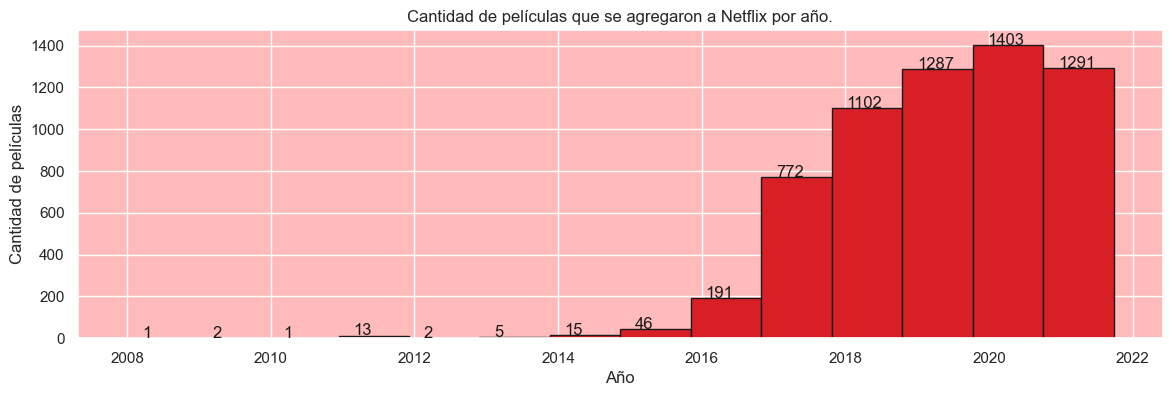

In [488]:
fig, ax = plt.subplots(figsize=(14,4))

ax.set_facecolor('#FFBBBB')
n, bins, patches = ax.hist(movies['fecha_de_inclusion_a_la_plataforma'], bins= 14, color= "#D81F26", edgecolor= "k")

for i in range(len(patches)):
    x= patches[i].get_x()
    y= patches[i].get_height() + 1
    ax.text(x + 75, y, str(int(n[i])), fontsize= 12, color= "k")

ax.set_title("Cantidad de películas que se agregaron a Netflix por año.")
ax.set_xlabel("Año")
ax.set_ylabel("Cantidad de películas")

plt.show()

Como podemos ver, Netflix se expande en el año ```2016```, y a partir de ahí adquirió grandes cantidades de películas para su plataforma.

¿Qué categorías tenían estas películas?

In [480]:
print(f"Existen las siguientes categorías: {list(movies['rating'].unique())}")

Existen las siguientes categorías: ['PG-13', 'PG', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y', 'R', 'TV-G', 'TV-Y7', 'G', 'NC-17', 'NaN', 'NR', 'TV-Y7-FV', 'UR']


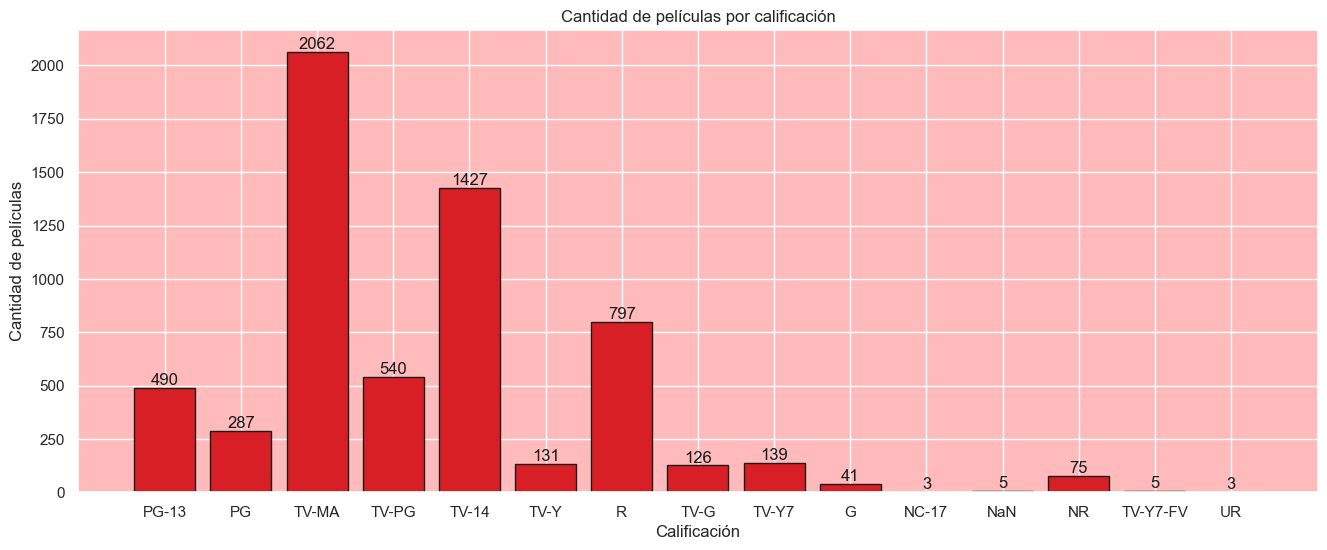

In [486]:
fig, ax = plt.subplots(figsize=(16,6))

cols = list(movies['rating'].unique())
dict_rating = {}
for rat in cols:
    dict_rating[f'{rat}'] = 0
for rate in movies['rating']:
    dict_rating[f'{rate}'] += 1

ax.set_facecolor('#ffbbbb')

ax.bar(x= cols, height= list(dict_rating.values()), color= "#d81f26", edgecolor= "k")
for x, y in dict_rating.items():
    ax.text(x, y, str(y), ha= 'center', va='bottom', color= 'k')

ax.set_title("Cantidad de películas por calificación")
ax.set_xlabel("Calificación")
ax.set_ylabel("Cantidad de películas")

plt.show()

Dentro de las películas disponibles, la calificación 'TV-MA', es la que más películas contiene.

Veamos los géneros de las películas.

In [482]:
import ast
lista_generos = []
for txt in movies['lista_generos']:
    texto = "["
    for letter in txt:
        if letter != ",":
            texto = texto + letter
        else:
            texto = texto + "', '"
    texto = texto + "]"
    if "' " in texto:
        texto = texto.replace("' ", "'")
    lista_generos.append(texto)


lista_generos_2 = []
for i in lista_generos:
    try:
        lista_generos_2.append(ast.literal_eval(i))
    except (ValueError, SyntaxError):
        text = ""
        for letter in i:
            if letter == "[":
                text = "['"
            elif letter == "]":
                text = text + "']"
            else:
                text = text + letter
        lista_generos_2.append(ast.literal_eval(text))

movies['lista_generos'] = lista_generos_2

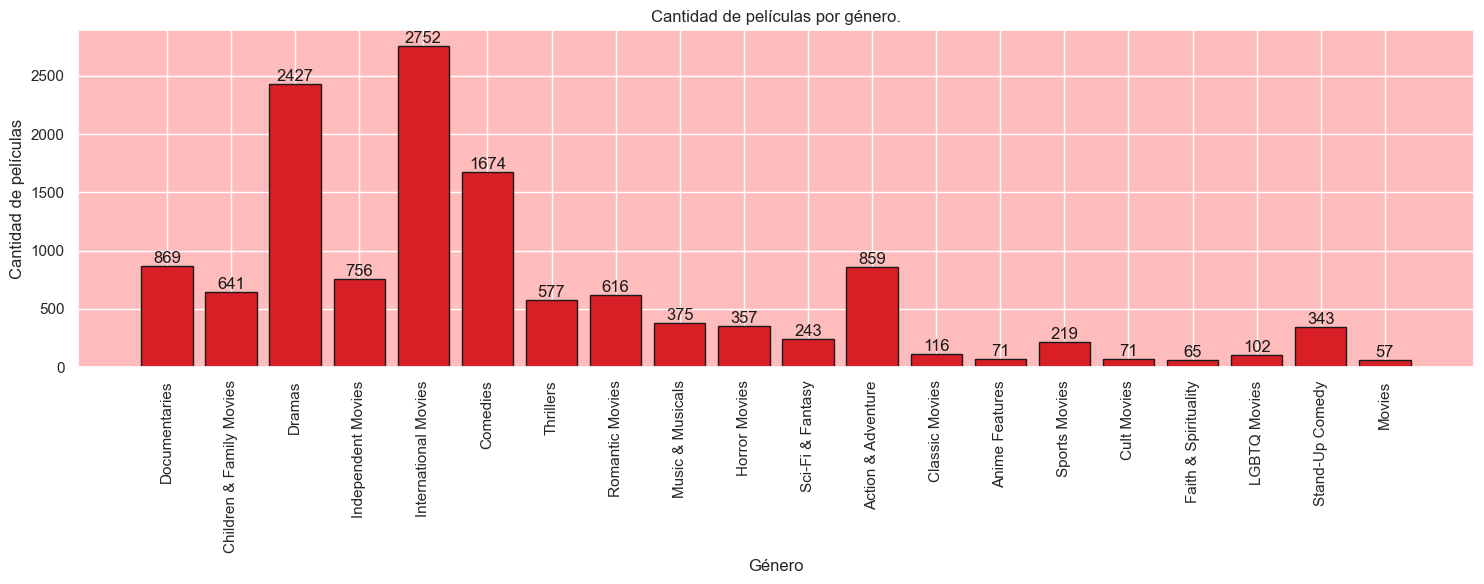

In [526]:
dict_genres = {}
for lst in movies['lista_generos']:
    for genre in lst:
        dict_genres[f'{genre}'] = 0

for lst in movies['lista_generos']:
    for genre in lst:
        dict_genres[f'{genre}'] += 1


fig, ax = plt.subplots(figsize=(15,6))
ax.bar(x= list(dict_genres.keys()), height= list(dict_genres.values()), color= "#D81F26", edgecolor= "k")
ax.set_facecolor('#FFbcbc')
for x, y in dict_genres.items():
    ax.text(x, y, str(y), ha= 'center', va= 'bottom', color= "k")
ax.set_xticklabels(list(dict_genres.keys()), rotation= 90)
ax.set_title("Cantidad de películas por género.")
ax.set_xlabel("Género")
ax.set_ylabel("Cantidad de películas")
plt.tight_layout()
plt.show()

Como nos indica el gráfico, Netflix tiene disponible más de 2000 Dramas o Películas Internacionales, más de 1600 comedias, entre muchas películas.

Para concluir nuestro análisis, veamos la duración de las películas.

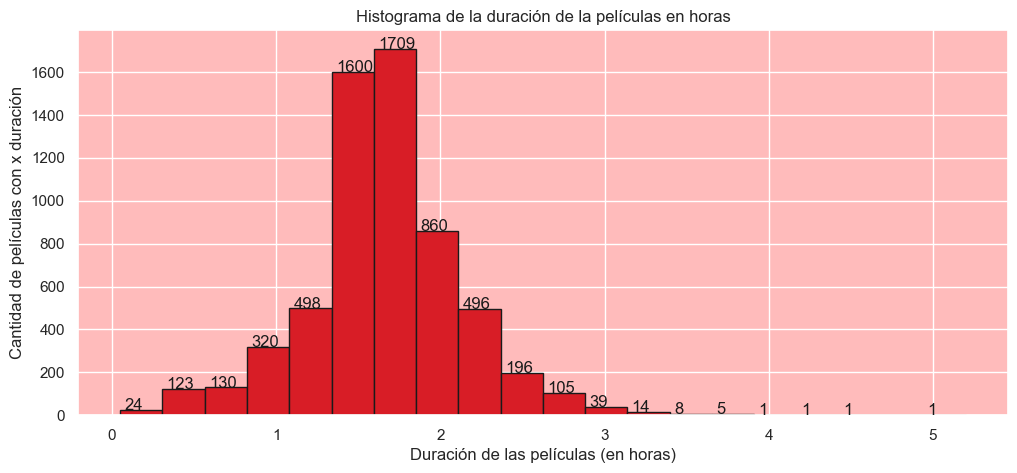

In [546]:
lista_duracion = []

for txt in movies['duracion']:
    txt = txt.replace(" min", "")
    lista_duracion.append(int(txt)/60)

fig, ax = plt.subplots(figsize=(12,5))


ax.set_facecolor("#ffBbBB")
n, bins, patches = ax.hist(lista_duracion, bins= 20, color= "#D81D26", edgecolor= "k")

for i in range(len(patches)):
    x= patches[i].get_x()
    y= patches[i].get_height()
    if y != 0: ax.text(x + 0.025, y, int(y), color= 'k')

ax.set_title("Histograma de la duración de la películas en horas")
ax.set_xlabel("Duración de las películas (en horas)")
ax.set_ylabel("Cantidad de películas con x duración")

plt.show()

Como puede mostrarnos el histograma la duración de las películas, comúnmente, tendrían una duración de entre una y dos horas.